<a href="https://colab.research.google.com/github/ETropynina/Titanik_EDA/blob/main/Titanik_EDA_task_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных датасета Титаник

Цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Работа будет выполнена с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Целевая переменная - столбец `Survived`.

## Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные.

In [3]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

In [4]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
431,432,1,3,Thorneycroft; Mrs. Percival (Florence Kate White),female,NaN,1,0,376564,16.100,NaN,S
675,676,0,3,Edvardsson; Mr. Gustaf Hjalmar,male,18.0,0,0,349912,7.775,NaN,S
736,737,0,3,Ford; Mrs. Edward (Margaret Ann Watson),female,48.0,1,3,W./C. 6608,34.375,NaN,S
875,876,1,3,"Najib; Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.225,NaN,C
557,558,0,1,Robbins; Mr. Victor,male,NaN,0,0,PC 17757,227.525,NaN,C


In [8]:
Data.shape

(891, 12)

## Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

In [10]:
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


### Столбец Sex

In [11]:
Data['Sex'].value_counts()

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [12]:
Data = Data[Data['Sex'] != 'unknown']

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

In [14]:
Data['Sex'] = Data['Sex'].map({'male' : 1, 'female' : 0})

In [15]:
Data['Sex'].value_counts()

Sex
1    574
0    312
Name: count, dtype: int64

Влияние пола на выживаемость

<ipython-input-19-c45fe20c581a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')


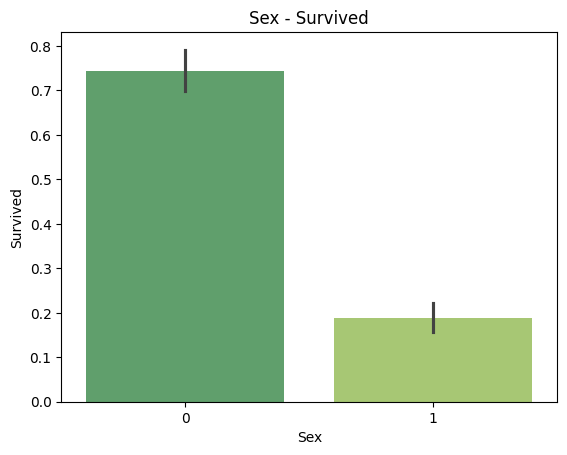

In [19]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

В основном выжили девушки

### Столбец Pclass

<Axes: xlabel='Sex', ylabel='Survived'>

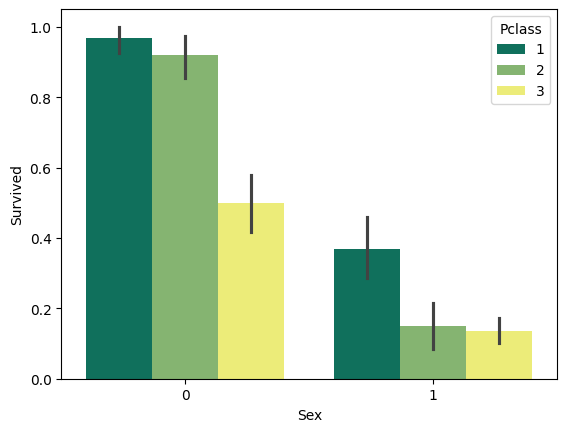

In [20]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer',hue='Pclass')

Пассажиры из 1-го класса выживали чаще всего

### Столбец Embarked

In [21]:
Data['Embarked'].value_counts()

Embarked
S    641
C    168
Q     75
Name: count, dtype: int64

In [22]:
Data = Data.drop(columns=['Embarked'])

### Столбец Age

Заполним пропуски медианным значением `Age`.

In [24]:
median_age = Data['Age'].median()
Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

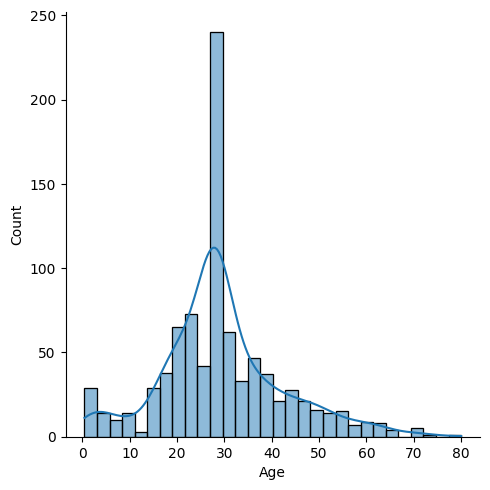

In [25]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

In [30]:
Data = Data.drop(columns=['Fare','Ticket','Name','Cabin'])

После минимальной обработки данных у нас получилась следующая таблица:

In [32]:
Data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


## Исследование признаков

Нарисуем матрицу корреляций столбцов между собой.

In [33]:
correlation_matrix = Data.corr(numeric_only=True)

<Axes: >

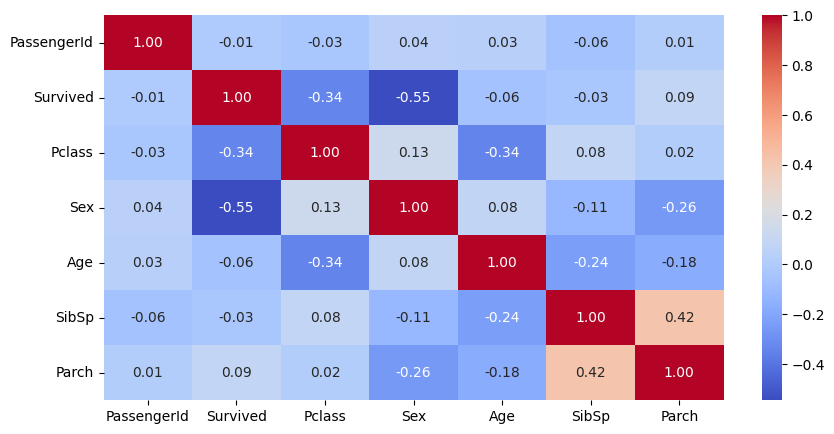

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Сильнее всего коррелирует с целевой переменной `Survived` - признак `Sex`

Посмотрим на попарные зависимости некоторых признаков.

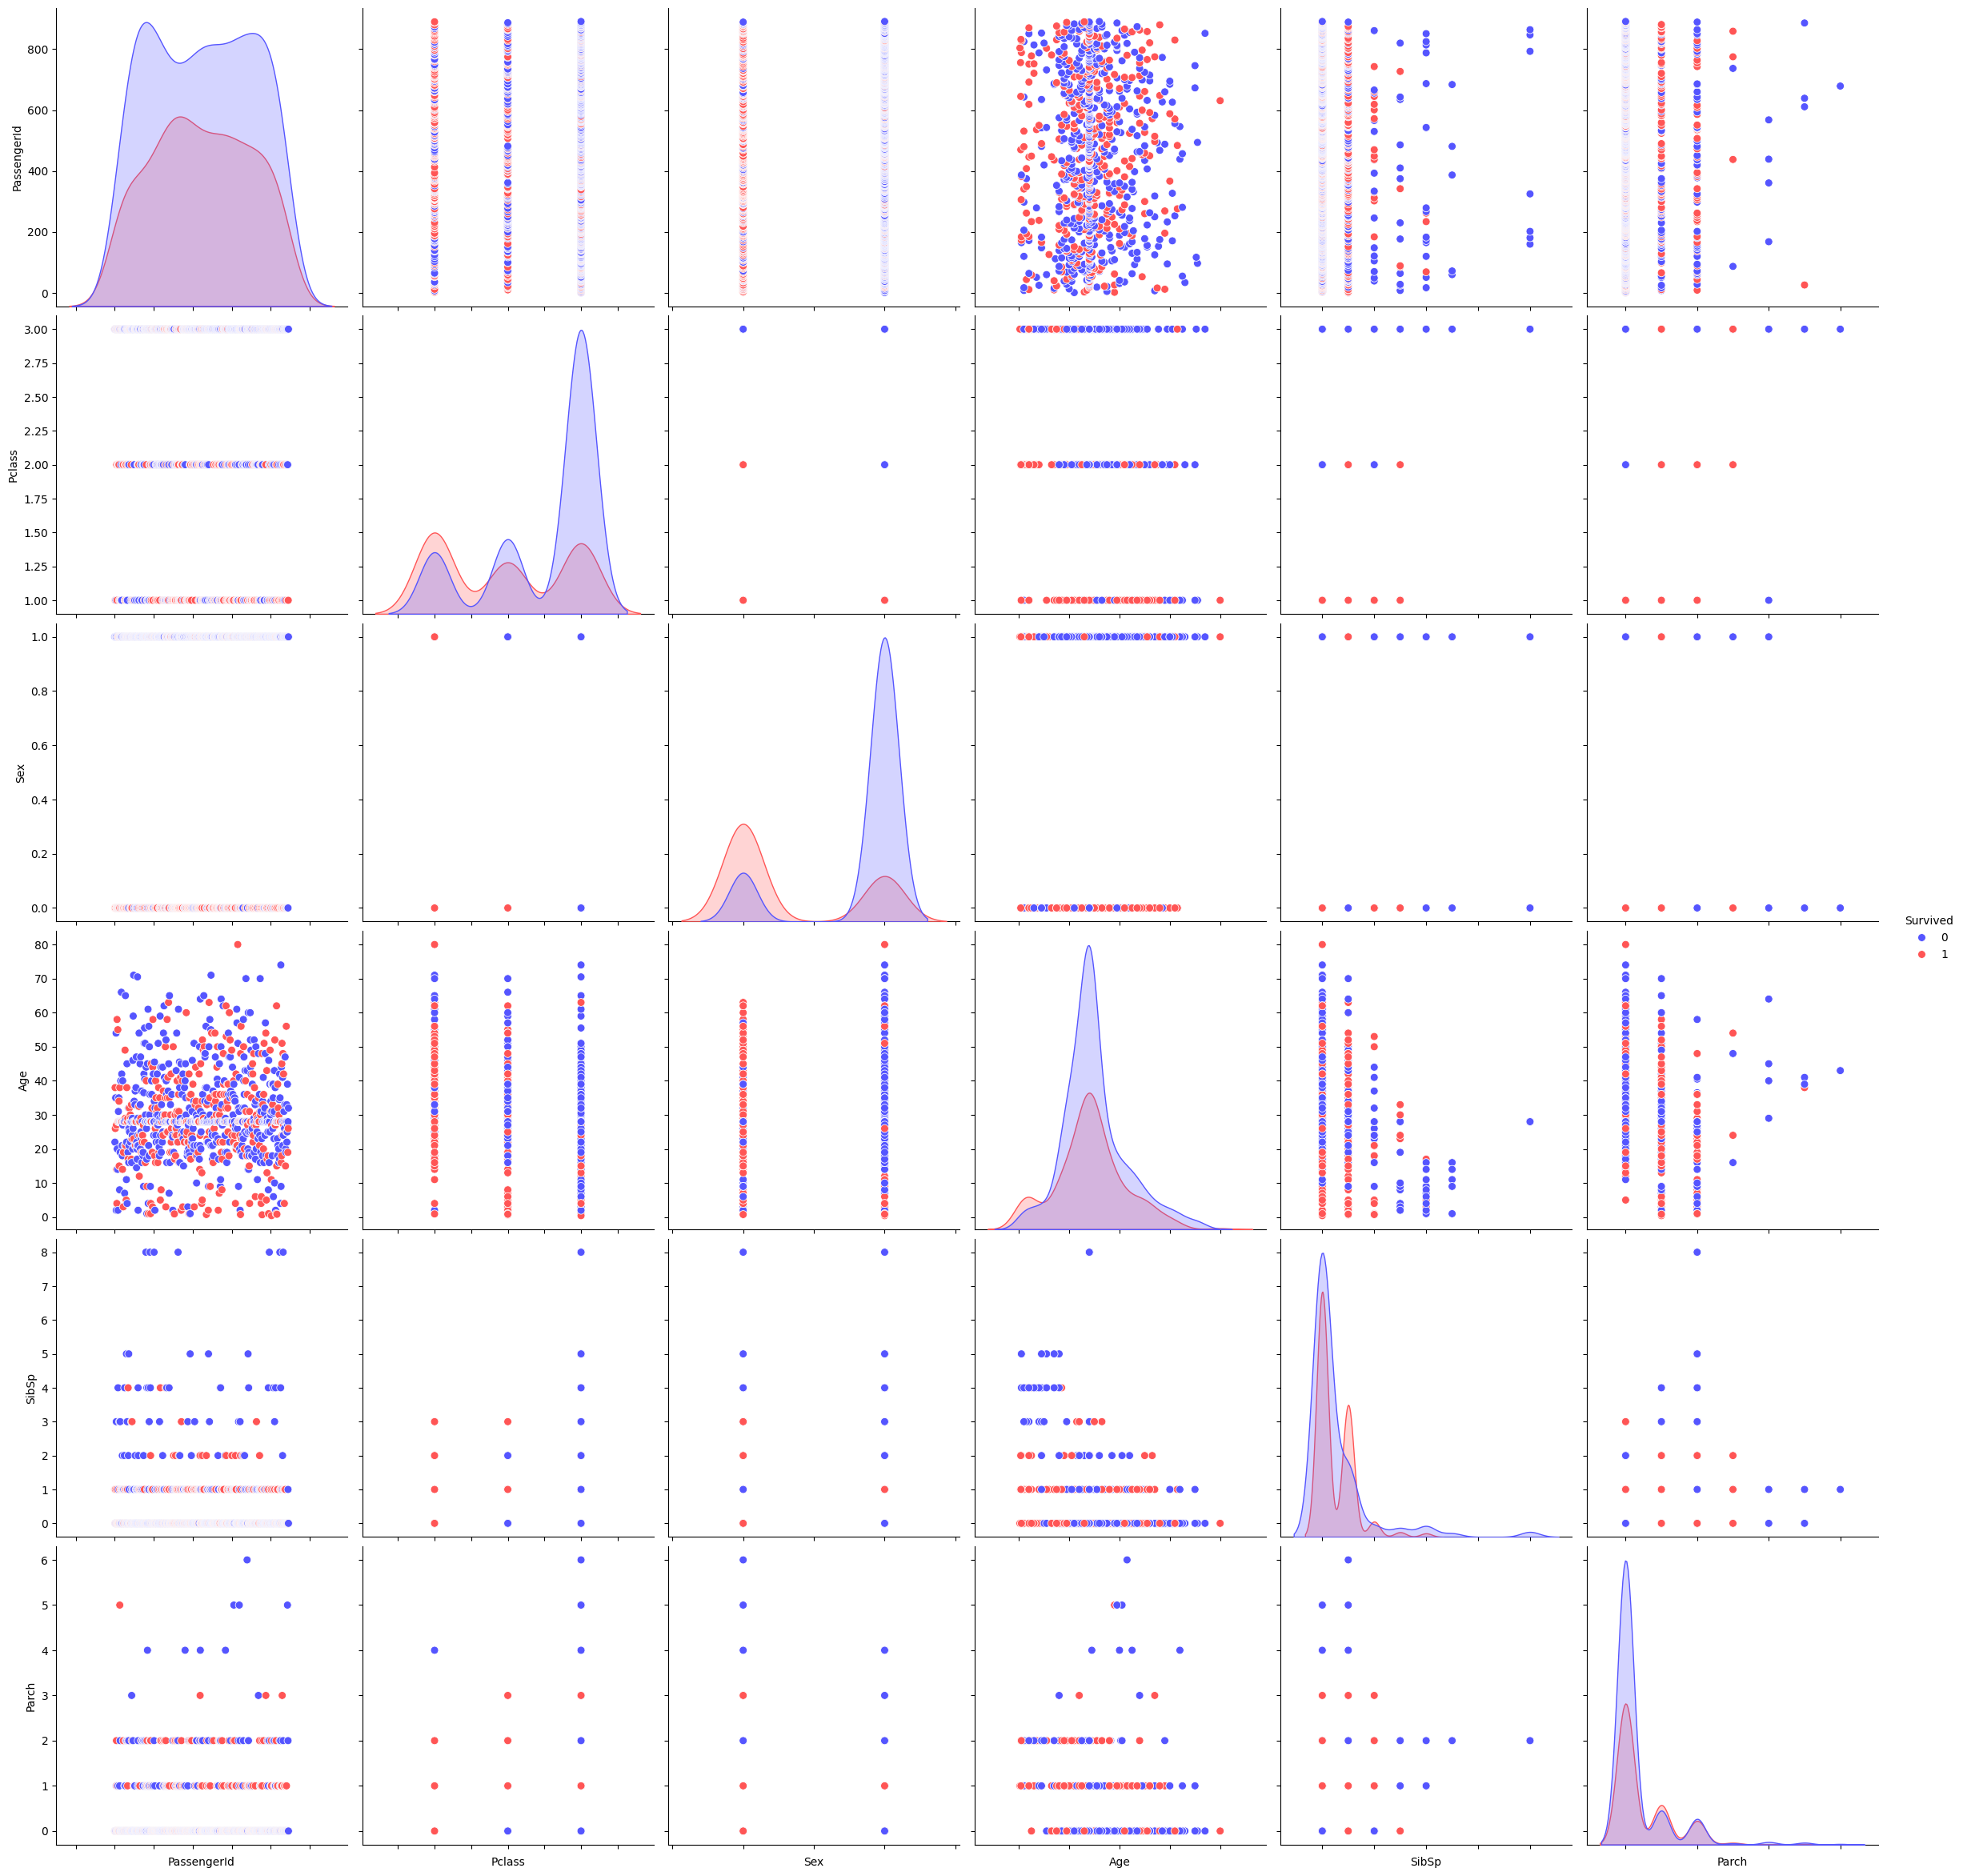

In [36]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [39]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )
df['NameLen'] = df['Name'].apply(len)

In [48]:
df['FamilySize'] = df.apply(lambda row: row['Parch'] + row['SibSp'] + 1, axis=1)
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})

In [44]:
df['IsAlone'] = df.apply(lambda row: 1 if row['FamilySize'] == 1 else 0, axis=1)

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,FamilySize,IsAlone
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,23,2,0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C,51,2,0
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S,44,2,0
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1.0,27.0,0,0,211536,13.0000,NaN,S,21,1,1
887,888,1,1,Graham; Miss. Margaret Edith,0.0,19.0,0,0,112053,30.0000,B42,S,28,1,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0.0,NaN,1,2,W./C. 6607,23.4500,NaN,S,40,4,0
889,890,1,1,Behr; Mr. Karl Howell,1.0,26.0,0,0,111369,30.0000,C148,C,21,1,1


<Axes: >

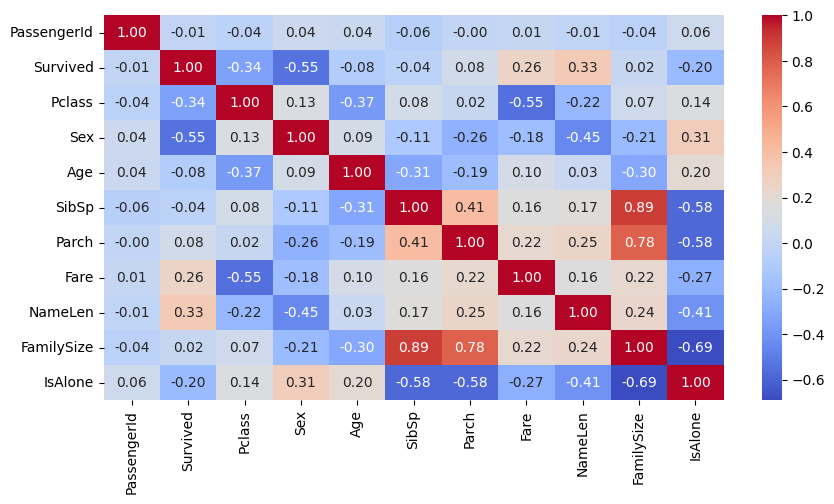

In [50]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

### Наша собственная модель

Напишем модель, предсказывающую выживаемость только по признаку `Sex`.

In [51]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [52]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.3837471783295711